# Part 2 

# Part 2: Exercises using the `NetworkX` library

We will analyse networks in Python using the [NetworkX](https://networkx.org/) library. The cool thing about networkx is that it includes a lot of algorithms and metrics for analysing networks, so you don't have to code things from scratch. Get started by running the magic ``pip install networkx`` command. Then, get familiar with the library through the following exercises: 

>  *Exercises*:

> * Go to the NetworkX project's [tutorial page](https://networkx.org/documentation/stable/tutorial.html). The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense.


> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
            * You can draw a, c, d. They have no more than two nodes with and uneven number of edges.
            
> * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).

> * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it). 

In [8]:
import networkx as nx
import numpy as np

In [5]:
G = nx.DiGraph()
G.add_nodes_from(list(range(1,7)))
G.add_edges_from([
    (1,2),
    (2,3), (2,4),
    (3,1), (3,2),
    (4,1),
    (6,1), (6,3)
])
H = nx.Graph(G) #undirected

In [21]:
print('Adjancency matrix G')
print(nx.to_numpy_matrix(G))

print('\nAdjacency matric H')
print(nx.to_numpy_matrix(H))

Adjancency matrix G
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]

Adjacency matric H
[[0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]


In [30]:
print('Linklist G')
print(G.edges)

print('\nLinklist H')
print(H.edges)

Linklist G
[(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]

Linklist H
[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]


In [35]:
print('Average clustering coefficient G')
print(nx.average_clustering(G))

print('\nAverage clustering coefficient H')
print(nx.average_clustering(H))

Average clustering coefficient G
0.32222222222222224

Average clustering coefficient H
0.6388888888888888


If we switch node 5 and 6 then the last and second last rows and columns are switched in the adjacency matrices and in the link list all 6's become 5's instead

In the linked list you only get information about nodes that are linked to other nodes. So you cannot see node 5, because it is not linked to any nodes. But in the adjacency matrix you have rows and columns for all nodes, so you can see node 5 there. So you can infer the total number of nodes in the adjacency matrix, but not in the linked list.

In [37]:
nx.path_graph(G).edges

EdgeView([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)])

8 paths for undirected:
(1,4,2,3)
(1,2,4,3)
(1,2,1,3)
(1,4,1,3)
(1,6,1,3)
(1,3,1,3)
(1,3,6,3)
(1,3,2,3)


# Bipartite

In [82]:
import numpy as np
nodes = np.arange(1, 12)
edges = [(1,7), (2,9), (3,7), (3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11)]
GBI = nx.Graph()
GBI.add_nodes_from(nodes)
GBI.add_edges_from(edges)

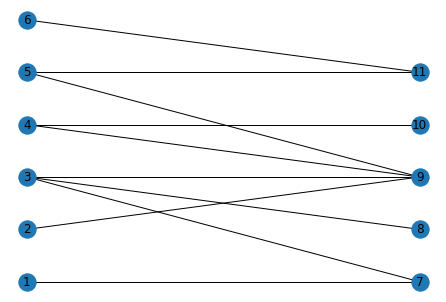

In [83]:
import matplotlib.pyplot as plt
X, Y = nx.bipartite.sets(GBI)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels = True)
plt.show()

In [103]:
nx.to_numpy_matrix(GBI)

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.]])

Block diagonal matrix because the lower end nodes 1 to 6 are not connect with each other and the same for the higher end nodes

### Projections

In [105]:
purp_proj = nx.bipartite.projection.projected_graph(GBI, list(range(1,7)))
gree_proj = nx.bipartite.projection.projected_graph(GBI, list(range(7,12)))

In [106]:
nx.to_numpy_matrix(purp_proj)

matrix([[0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0.],
        [1., 1., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 0.],
        [0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0.]])

In [107]:
nx.to_numpy_matrix(gree_proj)

matrix([[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 1., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [116]:
def avg_degree(G, nodes):
    degrees = list(nx.degree(G,nodes))
    return sum([b for a,b in degrees])/len(degrees)

In [117]:
purple_nodes = list(range(1,7))
green_nodes = list(range(7,12))
print(f'Average degree of purple nodes in full graph {avg_degree(GBI, purple_nodes)}')
print(f'Average degree of green nodes in full graph {avg_degree(GBI, green_nodes)}')


Average degree of purple nodes in full graph 1.6666666666666667
Average degree of green nodes in full graph 2.0


In [119]:
purple_nodes = list(range(1,7))
green_nodes = list(range(7,12))
print(f'Average degree of purple nodes purple projection {avg_degree(purp_proj, purple_nodes)}')
print(f'Average degree of green nodes in green projection {avg_degree(gree_proj, green_nodes)}')

Average degree of purple nodes purple projection 2.6666666666666665
Average degree of green nodes in green projection 2.0


# 